## Chapter 10. 매개변수 예측의 불안정성 (Instability of Parameter Estimates)


# 매개변수

매개변수(parameter) 는 dataset 을 구속(constraint) 하는 것을 말한다.
예를 들어 평균과 분산은 정규분포의 파라미터이다. 우리가 정규분포에서 sample 의 평균을 취하는 것은 분산의 평균을 계산하는 것을 말한다.

* parametric data VS non-parametric data

A parametric test is a test that requires a parametric assumption, such as normality. A nonparametric test does not rely on parametric assumptions like normality (Simon, 2005).   Whichever test a researcher decides to use, one must have a basic understanding of both parametric and nonparametric data.

Parametric data 는 측정될 수 있는 data 를 말한다. 예를들어, 높이, 무게, 깊이, 금액, 넚이가 모두 parametric data 이다. 이런 data 는 모두 parameter 가 있다.   구간 및 비율 측정은 parametric 으로 간주된다. 다음의 세가지 가정을 충족하는 data 는 parametric 하다고 간주된다 - normality, equal variances(동일한 분산) and independence 이다.

첫째, data 가 normal 하다고 간주되는 population 에서 구해진 것인가 ?

둘째, data 를 구한 population 은 equal variance 를 가지고 있어야 한다. F-test 를 이용하여 sample 들이 equal variance 를 가진 population 에서 얻어졌다는 가설을 test 할 수 있다.

세째, data 는 interval scale 로 측정되어야 한다. 

반면 Nonparametric data 는 parameter 가 없고 가정 없이 data 를 분석할 수 있도록 허용한다.

Specifically, nonparametric methods were developed to be used in cases when the researcher knows nothing about the parameters of the variable of interesting the population (Statsoft, Inc., 1984-2003).   Nonparametric data does not rely on parameters.   
Nonparametric data uses qualitative methods as opposed to quantitative methods. In sample studies, qualitative methods are more concerned with the experiences of the participants rather than numbers associated with parametric data.   In recent years, particularly in the health sciences, qualitative methods have become increasingly popular among researchers (Eachus, 2000)

## 알지 못하고 추정할 뿐이다

data set 의 평균을 구하려 할때 평균을 추정하게 되는데 얼마나 잘 추정했는지 알려면 stability/표준오차(standard error)/신뢰구간(confidence interval) 을 들여다 봐야 한다. 표준오차가 크면 예를 들어 beta 를 측정했어도 별로 쓸모가 없게 된다.

### 예측의 불안정성 (Instability of estimates)

특정 시계열 구간에서 측정된 파라미터 (예, $\beta$) 는 측정 구간과 측정 방법을 바꾸면 항상 바뀔 수 있다. 우리는 dataset 의 서로 다른 subset 에서의 parameter 변화를 들여다 봄으로서 우리가 측정한 것의 불확실성을 계량화 할 수 있다. 예를 들어, 표준편차는 각 관찰에서의 평균값과 전체 dataset 의 평균이 다른가를 표시해 준다. financial data 의 30 일 이동평균의 경우 우리의 측정 window 가 변하면서 이동평균이 얼마나 fluctuate 하는지 관찰하여 측정된 parameter 의 불안정성을 계산할 수 있다.

In [1]:
# We'll be doing some examples, so let's import the libraries we'll need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 예) 평균과 표준편차 (mean and standard deviation)

정규분포에서 평균이 0 이고 표준편차가 1 인 표준정규분포의 경우 sample 수에 따라 0 과 1 에 가깝게 평균과 표준편차가 변하는 것을 관찰할 수 있다.

* numpy.randn generates an array of shape (d0, d1, ..., dn), filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1

-0.340022518241
0.108349496382
0.0815816826625
0.056723800207


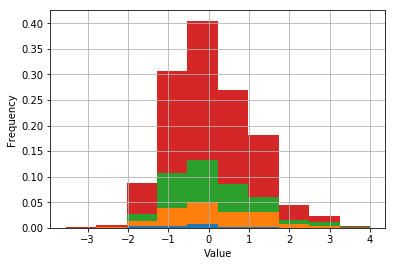

In [2]:
np.random.seed(300)

normal = np.random.randn(500)         # 500 개의 random 숫자 data set
print(np.mean(normal[:10]))                # 10 개의 평균
print(np.mean(normal[:100]))             # 100 개의 평균
print(np.mean(normal[:250]) )             # 250 개의 평균
print(np.mean(normal))                       # 500 개의 평균 --> 0 에 수렴

# Plot a stacked histogram of the data
plt.hist([normal[:10], normal[10:100], normal[100:250], normal], density=True, histtype='bar', 
                         stacked=True);
plt.grid(True)
plt.ylabel('Frequency')
plt.xlabel('Value');

In [3]:
print(np.std(normal[:10]))
print(np.std(normal[:100]))
print(np.std(normal[:250]))
print(np.std(normal))               # 1 에 수렴

0.826019411286
1.11351966937
1.06256354642
1.00232981999


시계열 DATA 를 가지고 연속된 subset of data 의 이동평균 (rollig 혹은 running)을 계산하여 각 시점에서 이전 n 개의 data 평균이 얼마나 변화하는지 90 일 이동평균으로 관찰.

## 예) 비정규 분포 (Non-Normal Underlying Distribution) 

data 성격이 비정규분포이면 거기에서 얻은 평균은 속임수 평균이 될 것이다. 이 때문에 자크베라 정규성 테스트 같은 정규성테스트(normality test) 가 중요하다.

mean: -0.0568190254338
standard deviation: 5.07182157429


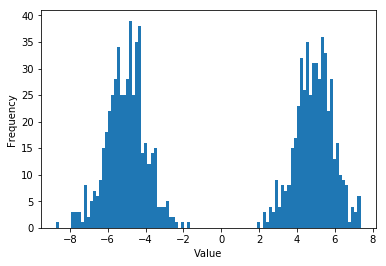

In [4]:
# 이항 분포 (정규분포가 아닌) test data 생성
def bimodal(n):
    X = np.zeros((n))
    for i in range(n):
        if np.random.binomial(1, 0.5) == 0:          # n, p : number of trials, probability of each trial
            X[i] = np.random.normal(-5, 1)              
        else:
            X[i] =  np.random.normal(5, 1)
    return X
            
X = bimodal(1000)

#Let's see how it looks
plt.hist(X, bins=100)
plt.ylabel('Frequency')
plt.xlabel('Value')
print('mean:', np.mean(X))
print('standard deviation:', np.std(X))

위에서의 평균은 data set 을 설명하는데 의미가 없다. mean 이 의미 있으려면 정규성을 가진 분포라야 한다. 아래는 위의 이항분포에서 계산한 평균과 std 를 가진 정규분포이다.

-0.0568190254338
5.07182157429


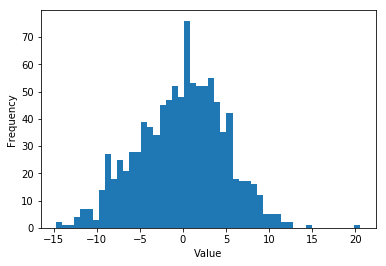

In [5]:
mu = np.mean(X)
sigma = np.std(X)

print(mu)
print(sigma)

N = np.random.normal(mu, sigma, 1000)       # 평균이 0.03 이고 std 가 5.098 인 1000 개의 random data set

plt.hist(N, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Value');

Jarque-Bera test 를 이용하여 정규성 테스트를 시행. p-value < 0.05 이면 비정규이다. 

In [6]:
from statsmodels.stats.stattools import jarque_bera

# test statistic, pvalue, Estimated skewness, Estimated kurtosis 
_, pvalue, _, _ = jarque_bera(X)       
print(pvalue)

1.92589344111e-31


p-value < 0.05 이면 X dataset 은 정규분포가 아니므로 정규분포에 기반한 추가적인 작업은 중지하는 것이 좋다.

## 예: Sharpe ratio

Sharpe ratio 는 Treasury bill 과 같은 risk-free return 에 대하여 포트폴리오에서 얻을 수 있는 단위 risk 당 추가 수익 이다

$$SR = \frac{E[r_a - r_f]}{\sqrt{Var(r_a - r_f)}} = \frac{E[r_a - r_f]}{\sigma{(r_a - r_f)}} $$

여기서 $r_a$는 asset 의 return 이고 $r_f$ 는 risk-free rate 이다. mean and standard deviation 을 가지고 시간 변화에 따른 이동 Sharpe ratio 를 계산할 수 있다.

아마존의 **최근 90일 Sharpe ratio 와 std** 를 계산하여 std 의 variance 정도가 자신이 세운 strategy 에 acceptable 한 범위인지 check 하여 변동성이 그 범위를 벗어나면 전략을 재 검토 해야 한다.

In [13]:
from googlefinance.client import get_price_data, get_prices_data

param = {
    'q': "BIL", # Use an ETF that tracks 3-month T-bills as our risk-free rate of return
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "NYSEARCA", # Stock exchange symbol on which stock is traded (ex: "NASD")
    'p': "3Y" # Period (Ex: "1Y" = 1 year)
}

treasury_ret = get_price_data(param).pct_change()['Close'][1:]

param = {
    'q': "AMZN", 
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "NASD", # Stock exchange symbol on which stock is traded (ex: "NASD")
    'p': "3Y" # Period (Ex: "1Y" = 1 year)
}

pricing = get_price_data(param)['Close']
returns = pricing.pct_change()[1:]

In [14]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree)/np.std(asset - riskfree)

# 90 일 running(rolling) sharpe ratio 계산
running_sharpe = [sharpe_ratio(returns[i-90:i], treasury_ret[i-90:i]) for i in range(90, len(returns))]

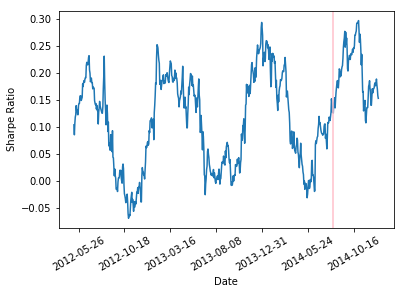

In [42]:
_, ax1 = plt.subplots()
ax1.plot(range(90, len(returns)), running_sharpe);
# 다음 100 일간 sharpe ratio 예측에  이전 sharpe ratio 가 도움되는지 
# 비교하기 위해 -100 일 위치에 vertical line 추가
ax1.axvline(len(returns) - 100, color='pink')
ticks = ax1.get_xticks() 
ax1.set_xticklabels([pricing.index[int(i)].date() for i in ticks[:-1]], rotation=30); # Label x-axis with dates
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio');

Sharpe ratio 의 변동성이 심한 것 같으므로 단순히 하나의 Sharpe 값을 결정하는 것은 미래 가치 예측에 도움이 되지 않음이 분명하다. 대신에 위 data 의 mean 과 std 를 구하여 다음 100 일 동안의 Sharpe ratio 예측에 도움 되는지 살펴 보자. 

Mean of running Sharpe ratio: 0.105388262218
std of running Sharpe ratio: 0.0845851008518


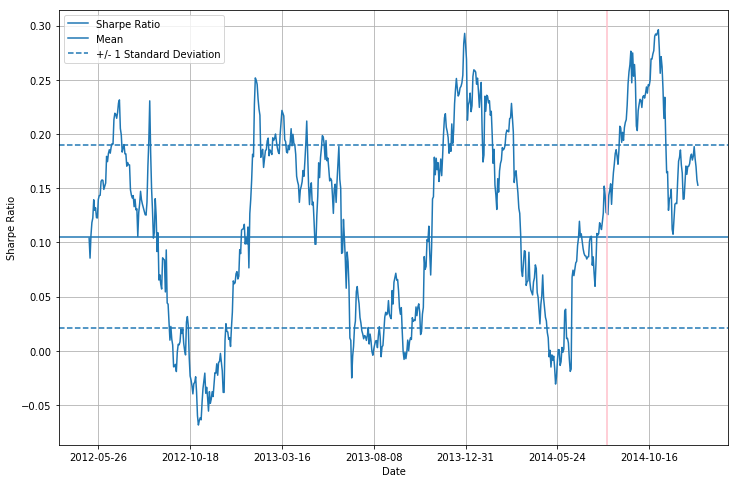

In [43]:
# Compute the mean and std of the running Sharpe ratios up to 100 days before the end
mean_rs = np.mean(running_sharpe[:-100])
std_rs = np.std(running_sharpe[:-100])

# Plot running Sharpe ratio
_, ax2 = plt.subplots(figsize=(12,8))
ax2.plot(range(90, len(returns)), running_sharpe)

# Plot its mean and the +/- 1 standard deviation lines
ax2.axhline(mean_rs)
ax2.axhline(mean_rs + std_rs, linestyle='--')
ax2.axhline(mean_rs - std_rs, linestyle='--')

# Indicate where we computed the mean and standard deviations
# Everything after this is 'out of sample' which we are comparing with the estimated mean and std
ax2.axvline(len(returns) - 100, color='pink');
ticks = ax2.get_xticks()
ax2.set_xticklabels([pricing.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend(['Sharpe Ratio', 'Mean', '+/- 1 Standard Deviation'])

print('Mean of running Sharpe ratio:', mean_rs)
print('std of running Sharpe ratio:', std_rs)

위의 경우 std 전체 변동폭의 거의 1/4 을 차지하므로 매우 변동성이 크다(volatile)고 할 수 있다. std 를 고려하면 단순히 평균만 고려하는 것 보다 예측에 도움을 받을 수 있다 Sharpe ratio 의 이동평균을 계산할 때도 standard deviation 을 감안해야 한다.

### 예) 이동평균(Moving Average)

90 일 이동평균을 예로 들어 보면, price 의 이동평균과 이동평균의 std 를 구할 수 있는데, std 자체도 변량이므로 이동평균과 std 를 구할 수 있다.

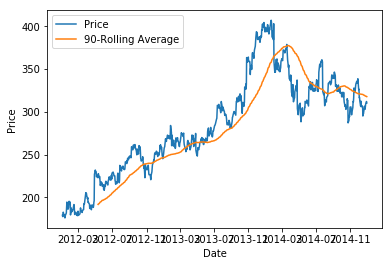

In [54]:
# Load time series of prices
param = {
    'q': "AMZN", 
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "NASDAQ", # Stock exchange symbol on which stock is traded (ex: "NASD")
    'p': "10Y" # Period (Ex: "1Y" = 1 year)
}
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2015-01-01')
pricing = get_price_data(param)['Close'].loc[start : end]

# Compute the rolling mean for each day
mu = pricing.rolling(window=90).mean()

# Plot pricing data
_, ax1 = plt.subplots()
ax1.plot(pricing)

#ax1.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]], rotation=30); # Label x-axis with dates
plt.ylabel('Price')
plt.xlabel('Date')

# Plot rolling mean
ax1.plot(mu);
plt.legend(['Price','90-Rolling Average']);

rolling mean 의 instability 와 표준오차 (standard error) 를 볼 수 있으므로 미래의 변동성 예측에 도움을 받을 수 있다. 변동성 자체의 평균과 std 를 이동평균 해보자.

In [45]:
print('Mean of rolling mean:', np.mean(mu))
print('std of rolling mean:', np.std(mu))

Mean of rolling mean: 288.342717169
std of rolling mean: 51.1609587306


아래는 표준편차의 90일 이동평균과 그 평균 및 표준편차이다.

Mean of rolling std: 17.4088179402
std of rolling std: 7.54914113583


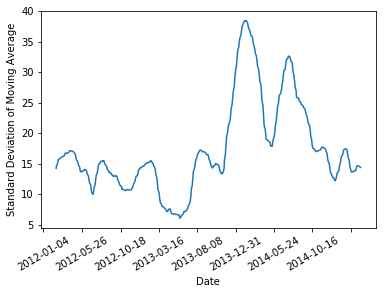

In [50]:
# Compute rolling standard deviation
std = pricing.rolling(90).std()

# Plot rolling std
_, ax2 = plt.subplots()
ax2.plot(std)
ax2.set_xticklabels([pricing.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.ylabel('Standard Deviation of Moving Average')
plt.xlabel('Date')
plt.xticks(rotation=30)

print('Mean of rolling std:', np.mean(std))
print('std of rolling std:', np.std(std))

Bollinger bands: rolling mean 과 mean 위쪽의 one rolling standard deviaiton 및 아래쪽의 one standard deviation 을 말한다.

standard deviation 이 data 의 spread 에 대한 추가적인 정보를 제공할지라도, underlying process 에 대한 특정한 분포를 가정하지 않고는 미래 관측에 대한 기대치에 정확한 확률을 할당할 수 없다.

### Plot Bollinger Bands

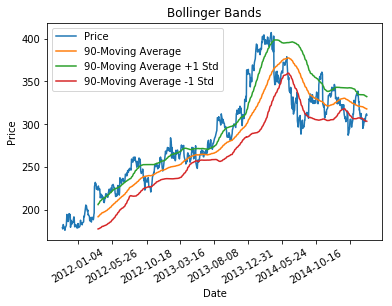

In [57]:
# Plot original data
_, ax3 = plt.subplots()
ax3.plot(pricing)
ax3.set_xticklabels([pricing.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates

# Plot Bollinger bands
ax3.plot(mu)
ax3.plot(mu + std)
ax3.plot(mu - std);
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['Price', '90-Moving Average', '90-Moving Average +1 Std', '90-Moving Average -1 Std'])
plt.title('Bollinger Bands')
plt.xticks(rotation=30);